In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos librerias de scikit learn para clasificacion y modelos de SVM.
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
# importamos librearias de Logistic Regression
from sklearn.linear_model import LogisticRegression

In [4]:
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

In [5]:
# Importamos librerias de PCA
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [6]:
pwd

'C:\\Users\\Kotz\\Documents\\Ciencia de datos\\Clases 2020\\clusterai_2020-master\\clases\\clase_06'

# Importamos dataset de Wisconsin Breast Cancer

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data.data
y = data.target

In [8]:
type(x)

numpy.ndarray

In [9]:
np.shape(x)

(569, 30)

In [10]:
type(y)

numpy.ndarray

In [11]:
np.shape(y)

(569,)

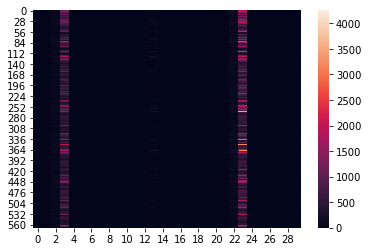

In [12]:
sns.heatmap(x)
plt.show()

# Recordemos que esto datos no estan pre-procesados!

In [ ]:
# Puedo aplicar el Scaler al heatmap (no estoy guardando variables, solo visualizando)
#sns.heatmap(StandardScaler().fit())
#plt.show()

# Separamos nuestros datos en Train y Test

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

# Realizamos Auto Scaling

In [14]:
# Step 4: auto scaling train-set (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(xtrain)
scaler

StandardScaler()

In [15]:
# Que es lo que estamos haciendo? Se calcula para cada sample su media y desvio. 
# Se transforma con el mu y sigma obtenidos en train, y luego se le resta el desvio propio
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest)  

In [16]:
xtrain_scal.shape

(398, 30)

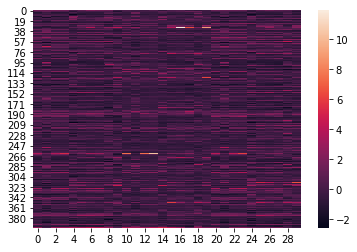

In [17]:
sns.heatmap(xtrain_scal)

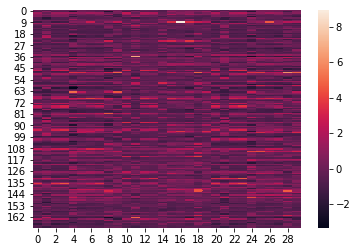

In [18]:
sns.heatmap(xtest_scal)

# Analisis de Componentes Principales (PCA)
Vamos a obtener primeros 10 autovalores y autovectores (eigenvalues y eigenvectors) de la matriz de train "xtrain_scal". 

In [19]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer (es un HyperParam: podriamos calcularlo con CrossValid, pero acá lo elegimos arbitrmte)
n_comps = 10
# definimos PCA llamando a la fción
pca = PCA(n_components= n_comps)

# fit_transform del PCA a nuestros datos. Aplico PCA en mi Train-set y guardo en dataframe de Pandas.
# Son las proyecciones! xpca = Z = espacio latente
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))

# obtenemos los auto-valores
# eigen-value me dice cuánta variab explica cada eigen-vector asociado
eigenvalues = pca.explained_variance_ratio_

In [20]:
pca.explained_variance_
# Explica var en valores absolutos

array([13.4149609 ,  5.49184539,  3.01966774,  1.92807587,  1.67421924,
        1.27573156,  0.65097105,  0.47929633,  0.38449003,  0.32309526])

In [21]:
pca.explained_variance_ratio_
# Explica en %

array([0.44604183, 0.18260156, 0.10040269, 0.06410772, 0.05566709,
       0.04241754, 0.02164451, 0.0159364 , 0.01278413, 0.01074278])

In [22]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones (definí n_comps)
xpca.shape

(398, 10)

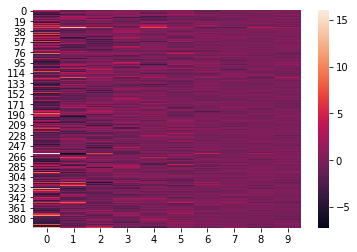

In [23]:
sns.heatmap(xpca)
# Recordar jerarquizacion de comps!
# Hacia la izq me explican más variabi
# A medida que agrego comps (a la derecha), se torna más rosado, explican menos


# Observamos los autovalores obtenidos del PCA
Recordemos que los autovalores significa la variabilidad que "atrapa" cada componente principal. Obviamente siempre vamos a priorizar las componentes principales que mayor variabilidad capten de los datos de entrenamiento.

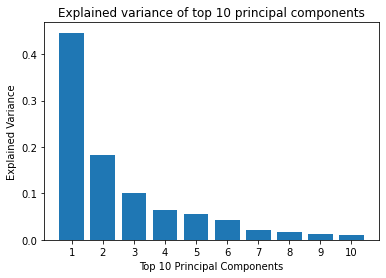

In [24]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' +  str(n_comps) + ' principal components')
plt.xlabel('Top '+ str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

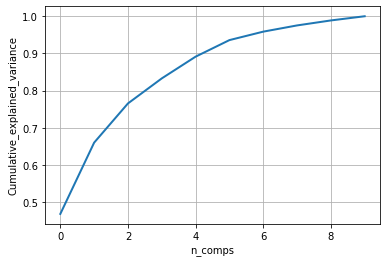

In [25]:
# tarea: Graficar variabilidad acumulada a medida que aumenta el número de componentes
# Plot the PCA spectrum


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_comps')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# Scatter plot del PCA
Con las 2 primeras componentes principales **antes** de la selección de variables visualizamos nuestras muestras/samples de train. **Atencion!** vean que estamos visualizando datos de 30 dimensiones en solamente 2 :). Otro punto importante es que con las dos primeras componentes principales captamos el 65 % aprox de la variabilidad de mis datos (hacer explained variance de PC1 + PC2)

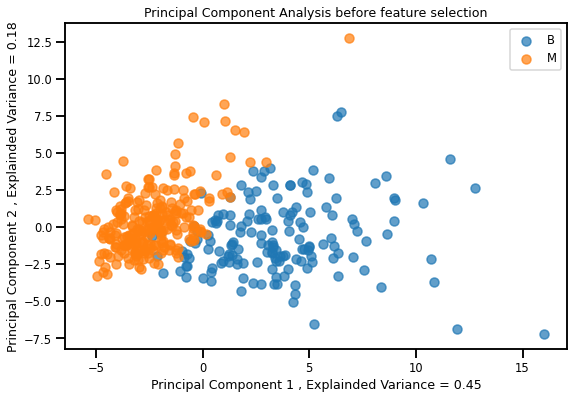

In [26]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.7, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

# Ver que son los % que vi antes con "pca.explained_variance_ratio_" es decis, mis eigenvalue (autovalores)

Estamos visualizando datos de alta dimension en 2 dimensiones :):):):). Ojo que con las dos primeras componentes visualizamos el 63% de la variabilidad del dataset original. Es decir que sirve para darnos una idea aunque lo que se aconseja es quedarse con las componentes que acumulan aunque sea el 80% de la variabilidad original.

In [27]:
# vamos a visualizar en 3d
from mpl_toolkits.mplot3d import Axes3D

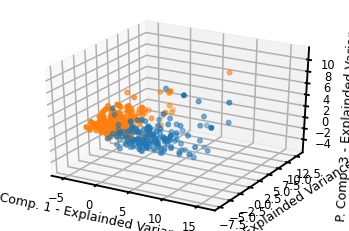

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Hacemos dos lines porque c/u explica una clase
ax.scatter(xpca.iloc[(ytrain == 0).ravel(),0], xpca.iloc[(ytrain == 0).ravel(),1], xpca.iloc[(ytrain == 0).ravel(),2])
ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 1 - Explainded Variance = ' + str(np.round(eigenvalues[0],3)))
ax.set_ylabel('P. Comp. 2 - Explainded Variance = ' + str(np.round(eigenvalues[1],3)))
ax.set_zlabel('P. Comp. 3 - Explainded Variance = ' + str(np.round(eigenvalues[2],3)))
plt.show()

# kernel-PCA

Computamos el desvio standard de cada feature. Luego decidimos quedarnos con aquellas cuyo STDEV sea mayor a un cuantil determinado. Eso resultara de un vector "mascara" booleano que nos serirá para filtrar el dataset original. Vean que este metodo es no supervisado aunque su debilidad es que es univariado.

In [29]:
from sklearn.decomposition import PCA, KernelPCA

In [30]:
# cantidad de componentes a extraer
n_comps = 10
# definimos KPCA
kpca = KernelPCA(n_components= n_comps, kernel = 'rbf', gamma = 0.14)
# fit_transform del PCA a nuestros datos
xkpca = pd.DataFrame(kpca.fit_transform(xtrain_scal))

# kernel Gaussian: kernel = 'rbf'
# gamma muy alto: se flexibiliza la linealidad, kernel que se adapta un montón
# gamma muy bajo: kernel casi lineal

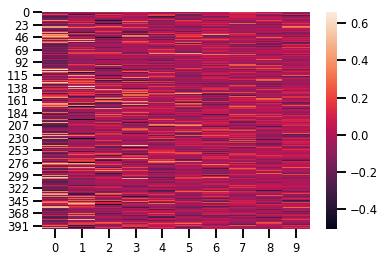

In [31]:
# En kpca estoy usando la Matriz de Similaridad entre las MUESTRAS. 
# kpca proyecta en otras direcciones las muestras originales, en un nuevo espacio.
# Que cant de comp le puedo pedir max? Hasta 500 aprox?
sns.heatmap(xkpca)

### Scatter plot del K-PCA

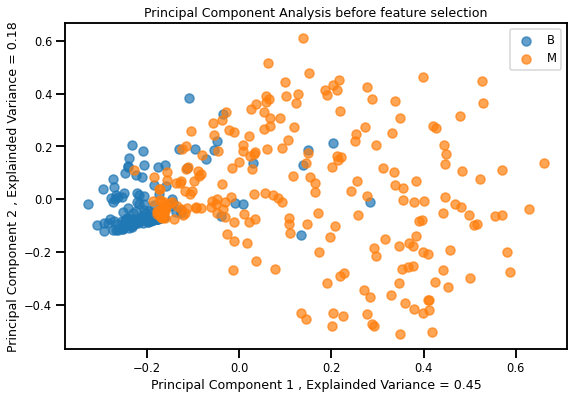

In [32]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xkpca.loc[(ytrain == 0).ravel(),0],xkpca.loc[(ytrain == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xkpca.loc[(ytrain == 1).ravel(),0],xkpca.loc[(ytrain == 1).ravel(),1], alpha = 0.7, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

# alpha cambia la transparencia de los colores

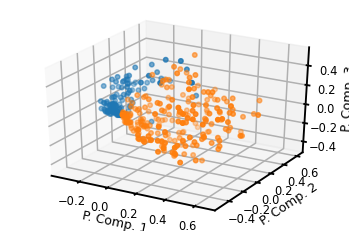

In [33]:
# Visualización en 3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xkpca.iloc[(ytrain == 0).ravel(),0], xkpca.iloc[(ytrain == 0).ravel(),1], xkpca.iloc[(ytrain == 0).ravel(),2])
ax.scatter(xkpca.iloc[(ytrain == 1).ravel(),0], xkpca.iloc[(ytrain == 1).ravel(),1], xkpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 1')
ax.set_ylabel('P. Comp. 2')
ax.set_zlabel('P. Comp. 3')
plt.show()

# Asignacion 01:
Partiendo de los datos originales crear un nuevo train-test split donde train es el 10% de los datos. Reducir la dimension con PCA y kPCA. Clasificar usando las proyecciones obtenidas con logistic regression. Medir la calidad de la clasificacion en area debajo de la curva y accuracy.

### Separamos datos en Train y Test + Auto Scaling

In [34]:
# train test split con 0.9 test size
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size=0.9, random_state=4)

In [35]:
# definir scaler .fit(xtrain_scal2)
scaler2 = StandardScaler().fit(xtrain2)
scaler2

StandardScaler()

In [36]:
# guardamos el split escalado
xtrain2_scal = scaler.transform(xtrain2)  
xtest2_scal = scaler.transform(xtest2)  

### PCA
Vamos a obtener primeros 10 autovalores y autovectores (eigenvalues y eigenvectors) de la matriz de train "xtrain2_scal". 

In [51]:
n_comps2 = 3
pca2 = PCA(n_components= n_comps2)
# fit_transform del PCA a nuestros datos
xpca2 = pd.DataFrame(pca2.fit_transform(xtrain2_scal))
eigenvalues2 = pca2.explained_variance_ratio_

In [52]:
xpca2.shape

(56, 3)

In [53]:
eigenvalues2

array([0.55659136, 0.16103229, 0.08283084])

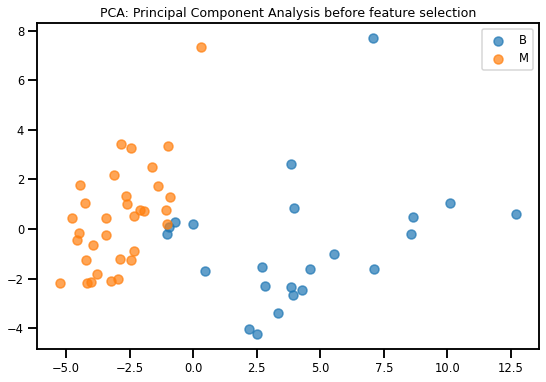

In [54]:
# Visualizamos PCA 
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca2.loc[(ytrain2 == 0).ravel(),0],xpca2.loc[(ytrain2 == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xpca2.loc[(ytrain2 == 1).ravel(),0],xpca2.loc[(ytrain2 == 1).ravel(),1], alpha = 0.7, label = 'M')
#plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
#plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('PCA: Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

In [55]:
# Guardo las proyecciones obtenidas
xpca2_train = pca2.transform(xtrain2_scal)
xpca2_test = pca2.transform(xtest2_scal)

In [ ]:
#xpca2

### k-PCA

In [56]:
n_comps = 3
kpca2 = KernelPCA(n_components= n_comps, kernel = 'rbf', gamma = 0.08)
# fit_transform del KPCA a nuestros datos
xkpca2 = pd.DataFrame(kpca2.fit_transform(xtrain2_scal))

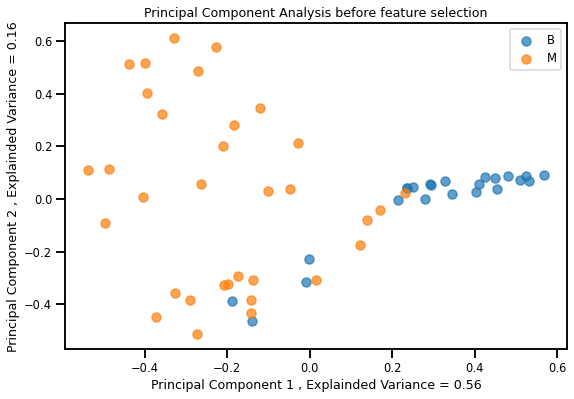

In [43]:
# Visualizamos KPCA 
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xkpca2.loc[(ytrain2 == 0).ravel(),0],xkpca2.loc[(ytrain2 == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xkpca2.loc[(ytrain2 == 1).ravel(),0],xkpca2.loc[(ytrain2 == 1).ravel(),1], alpha = 0.7, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues2[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues2[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

In [57]:
# Guardo las proyecciones obtenidas
xkpca2_train = kpca2.transform(xtrain2_scal)
xkpca2_test = kpca2.transform(xtest2_scal)

### Logistic Regression

#### PCA

In [58]:
from sklearn.linear_model import LogisticRegression
# Defino el modelo
lr_pca2 = LogisticRegression(random_state=0, solver='lbfgs')
# Entreno el modelo. Lo ajusto a las muestras de training, utilizando tanto Xtrain (las del espacio PCA!) como Ytrain
lr_pca2.fit(xpca2_train, ytrain2) 

LogisticRegression(random_state=0)

In [59]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred_pca2 = lr_pca2.predict(xpca2_test)

In [60]:
# Computo el accuracy (comparo ytest vs ypred_pca)
acc_lr_pca2 =  accuracy_score(ytest2, ypred_pca2)
print("El accuracy es " + str(acc_lr_pca2))

# Computo AUC
yproba = lr_pca2.predict_proba(xpca2_test)
fpr1, tpr1, thresholds = roc_curve(ytest2.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El accuracy es 0.9337231968810916
El AUC es = 0.9822326735906983


#### kPCA

In [61]:
# Defino el modelo
lr_kpca2 = LogisticRegression(random_state=0, solver='lbfgs')
# Entreno el modelo. Lo ajusto a las muestras de training, utilizando tanto Xtrain (las del espacio kPCA!) como Ytrain
lr_kpca2.fit(xkpca2_train, ytrain2) 

LogisticRegression(random_state=0)

In [62]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred_kpca2 = lr_kpca2.predict(xkpca2_test)

In [63]:
# Computo el accuracy (comparo ytest vs ypred_pca)
acc_lr_kpca2 =  accuracy_score(ytest2, ypred_kpca2)
print("El accuracy es " + str(acc_lr_kpca2))

# Computo AUC
yproba = lr_kpca2.predict_proba(xkpca2_test)
fpr1, tpr1, thresholds = roc_curve(ytest2.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El accuracy es 0.9142300194931774
El AUC es = 0.975063688026651
